In [1]:
# import libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

In [2]:
# create the dataset

np.random.seed(42)

data = {
    'product_id':range(1,21),
    'product_name':[f'Product{i}'for i in range(1,21)],
    'category' : np.random.choice(['Electronics','Clothing','Home','Sports'],20),
    'units_sold':np.random.poisson(lam=20,size=20),
    'sales_date':pd.date_range(start='2023-01-01',periods=20,freq='D')
}

sales_data = pd.DataFrame(data)
print('Sales Data :')
print(sales_data)

Sales Data :
    product_id product_name     category  units_sold sales_date
0            1     Product1         Home          25 2023-01-01
1            2     Product2       Sports          15 2023-01-02
2            3     Product3  Electronics          17 2023-01-03
3            4     Product4         Home          19 2023-01-04
4            5     Product5         Home          21 2023-01-05
5            6     Product6       Sports          17 2023-01-06
6            7     Product7  Electronics          19 2023-01-07
7            8     Product8  Electronics          16 2023-01-08
8            9     Product9         Home          21 2023-01-09
9           10    Product10     Clothing          21 2023-01-10
10          11    Product11         Home          17 2023-01-11
11          12    Product12         Home          22 2023-01-12
12          13    Product13         Home          14 2023-01-13
13          14    Product14         Home          17 2023-01-14
14          15    Product15

In [3]:
# save the dataframe to csv file

sales_data.to_csv('sales_data.csv',index=False)

In [4]:
import os 
os.getcwd()

'c:\\Users\\ADMIN\\Desktop\\inferencial project'

In [5]:
# Descriptive stats 

descriptive_stats = sales_data['units_sold'].describe()
print('\nDescriptive statistics for units sold :')
print(descriptive_stats)

mean_sales =sales_data['units_sold'].mean()
median_sales=sales_data['units_sold'].median()
mode_sales=sales_data['units_sold'].mode()[0]
variance_sales=sales_data['units_sold'].var()
std_sales=sales_data['units_sold'].std()

category_stats = sales_data.groupby('category')['units_sold'].agg(['sum','mean','std']).reset_index()

# display the result 
print('\n Statistical Analysis :')
print(f'mean units sold : {mean_sales}')
print(f'median units sold : {median_sales}')
print(f'mode units sold : {mode_sales}')
print(f'variance units sold : {variance_sales}')
print(f'std units sold : {std_sales}')
print(category_stats)


Descriptive statistics for units sold :
count    20.000000
mean     18.800000
std       3.302312
min      13.000000
25%      17.000000
50%      18.500000
75%      21.000000
max      25.000000
Name: units_sold, dtype: float64

 Statistical Analysis :
mean units sold : 18.8
median units sold : 18.5
mode units sold : 17
variance units sold : 10.905263157894737
std units sold : 3.302311789927586
      category  sum       mean       std
0     Clothing   21  21.000000       NaN
1  Electronics   73  18.250000  2.217356
2         Home  181  20.111111  3.723051
3       Sports  101  16.833333  2.714160


In [6]:
# Confidence Interval for the mean of units sold
confidence_level = 0.95
degrees_freedom = len(sales_data['units_sold']) - 1
sample_mean = mean_sales
sample_standard_error = std_sales / np.sqrt(len(sales_data['units_sold']))

# t-score for the confidence level
t_score = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)
margin_of_error = t_score * sample_standard_error

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("\nConfidence Interval for the Mean of Units Sold:")
print(confidence_interval)


Confidence Interval for the Mean of Units Sold:
(17.254470507823573, 20.34552949217643)


## hypothesis testing

In [7]:
# Hypothesis Testing (t-test)
# Null hypothesis: Mean units sold is equal to 20
# Alternative hypothesis: Mean units sold is not equal to 20

t_statistic, p_value = stats.ttest_1samp(sales_data['units_sold'], 20)

print("\nHypothesis Testing (t-test):")
print(f"T-statistic: {t_statistic}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The mean units sold is significantly different from 20.")
else:
    print("Fail to reject the null hypothesis: The mean units sold is not significantly different from 20.")


Hypothesis Testing (t-test):
T-statistic: -1.6250928099424466, P-value: 0.12061572226781002
Fail to reject the null hypothesis: The mean units sold is not significantly different from 20.


## Visualizations

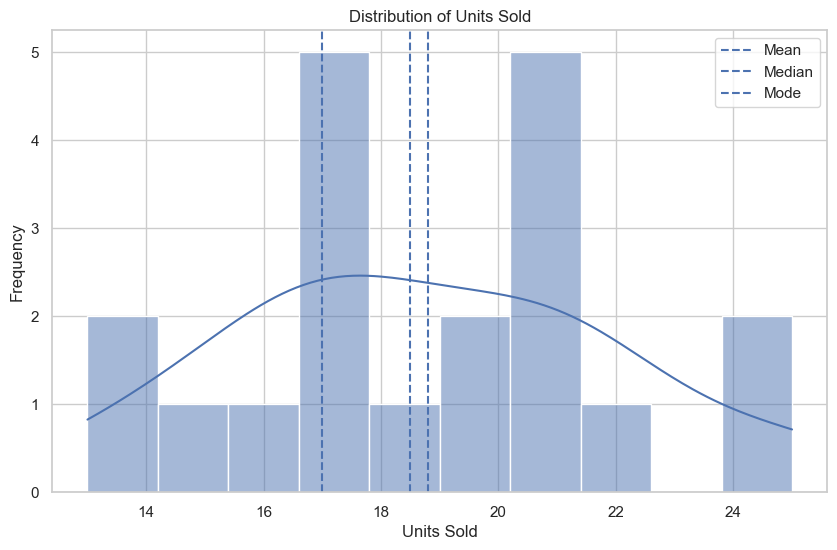

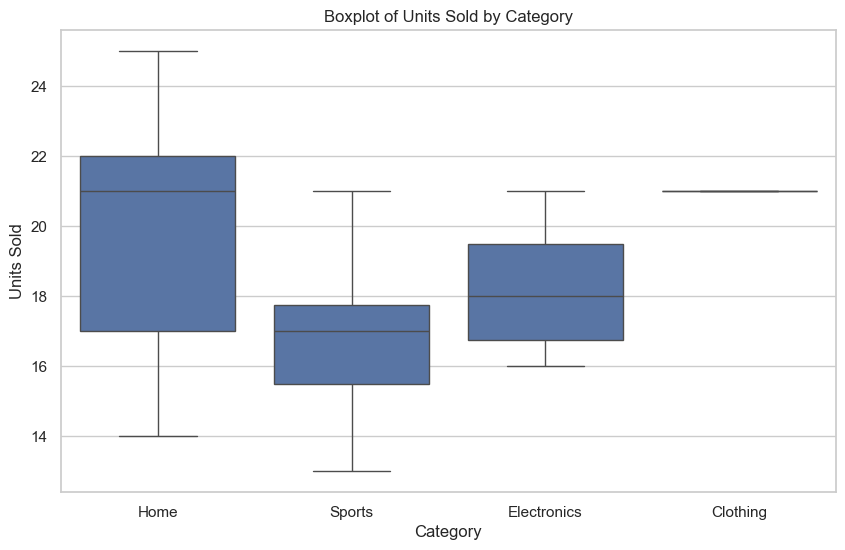

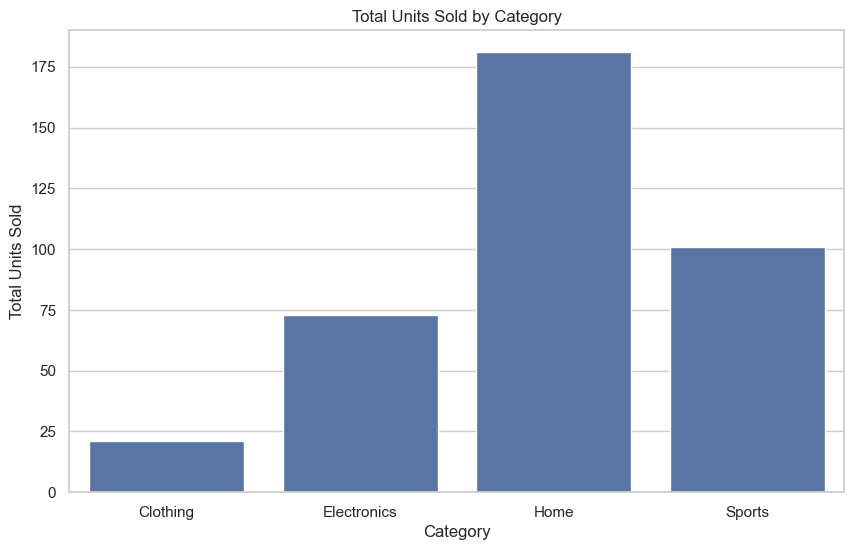

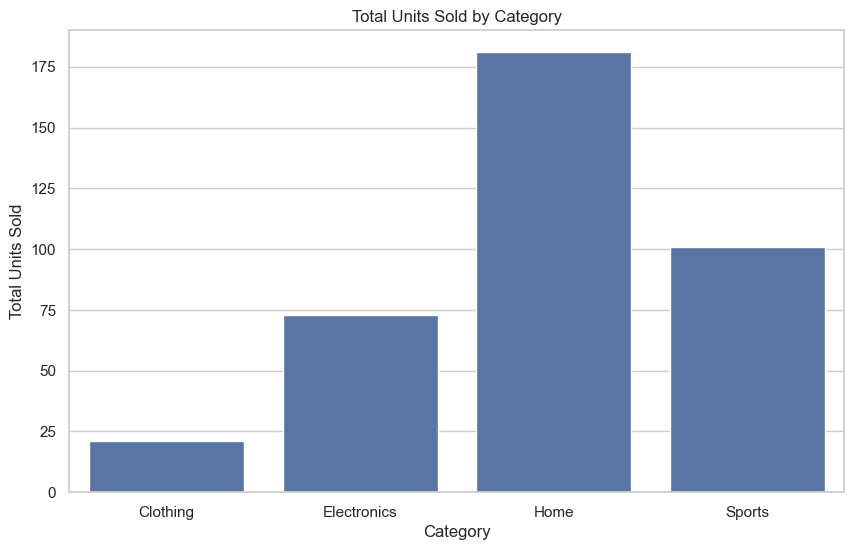

In [11]:
# Visualizations
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(sales_data['units_sold'], bins=10, kde=True)
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')

plt.axvline(mean_sales, linestyle='--', label='Mean')
plt.axvline(median_sales, linestyle='--', label='Median')
plt.axvline(mode_sales, linestyle='--', label='Mode')

plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='units_sold', data=sales_data)
plt.title('Boxplot of Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='sum', data=category_stats)
plt.title('Total Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Units Sold')
plt.show()

category_stats.rename(columns={
    'category': 'Category',
    'sum': 'Total Units Sold'
}, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Total Units Sold', data=category_stats)
plt.title('Total Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Units Sold')
plt.show()
